In [79]:
#all imports
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('forPredictions/2026predictedparkingdata_streamlined.csv')
df.head()



,Date,DayOfWeek,LOT 2 General % Capacity,LOT 2 General Occupied,LOT 2 General Spaces,LOT 2 Premium % Capacity,LOT 2 Premium Occupied,LOT 2 Premium Spaces,LOT 3 % Capacity,LOT 3 Occupied,...,LOT 4 General Spaces,LOT 4 Premium % Capacity,LOT 4 Premium Occupied,LOT 4 Premium Spaces,LOT 5 % Capacity,LOT 5 Occupied,LOT 5 Spaces,LOT 6 % Capacity,LOT 6 Occupied,LOT 6 Spaces
0,1/1/2026,Thursday,0.527785,643.370048,1214,0.802661,276.956274,345,0.491061,585.344258,...,1430,0.930565,327.539258,350,0.039148,86.126115,2296,0.563164,753.179484,1337
1,1/2/2026,Friday,0.507959,619.201436,1214,0.762035,262.902021,345,0.540489,644.263119,...,1430,0.871548,306.508095,350,0.025829,56.823972,2296,0.591130,782.013635,1337
2,1/3/2026,Saturday,0.506889,617.897905,1214,0.756364,261.005480,345,0.521952,622.166710,...,1430,0.886594,312.081175,350,0.020538,45.184020,2296,0.598730,794.560909,1337
3,1/4/2026,Sunday,0.493835,601.984773,1214,0.702736,242.443964,345,0.521291,621.379208,...,1430,0.860943,302.820425,350,0.096972,213.338492,2296,0.552440,740.862202,1337
4,1/5/2026,Monday,0.505808,616.579473,1214,0.742153,256.042770,345,0.456853,544.568651,...,1430,0.893240,314.434342,350,0.067921,149.426739,2296,0.529944,704.855720,1337


In [306]:
facility_avg = df['Total % Capacity'].mean() * 100
print(f"Facility Average Occupancy: {facility_avg:.2f}%")

Facility Average Occupancy: 57.62%


In [235]:
# Lot columns
lot_occ_cols = [
    'LOT 2 General Occupied', 'LOT 2 Premium Occupied',
    'LOT 3 Occupied', 'LOT 4 General Occupied',
    'LOT 4 Premium Occupied', 'LOT 5 Occupied',
    'LOT 6 Occupied'
]

lot_space_cols = [
    'LOT 2 General Spaces', 'LOT 2 Premium Spaces',
    'LOT 3 Spaces', 'LOT 4 General Spaces',
    'LOT 4 Premium Spaces', 'LOT 5 Spaces',
    'LOT 6 Spaces'
]

# Total facility occupancy %
total_occ = df[lot_occ_cols].sum().sum()
total_space = df[lot_space_cols].sum().sum()
facility_pct = total_occ / total_space * 100

print(f"Total Facility Average Occupancy: {facility_pct:.2f}%")


Total Facility Average Occupancy: 57.62%


In [101]:
r = df.sample(n=10)
r

,Date,DayOfWeek,LOT 2 General % Capacity,LOT 2 General Occupied,LOT 2 General Spaces,LOT 2 Premium % Capacity,LOT 2 Premium Occupied,LOT 2 Premium Spaces,LOT 3 % Capacity,LOT 3 Occupied,...,LOT 5 % Capacity,LOT 5 Occupied,LOT 5 Spaces,LOT 6 % Capacity,LOT 6 Occupied,LOT 6 Spaces,Total Occupied,Total Spaces,Total % Capacity,Month
9,2026-01-10,Saturday,0.506889,617.897905,1214,0.756364,261.005480,345,0.521952,622.166710,...,0.020538,45.184020,2296,0.598730,794.560909,1337,3451.599592,8164,0.422783,2026-01
324,2026-11-21,Saturday,0.642449,781.047500,1214,0.836893,289.780508,345,0.745798,888.991099,...,0.592275,1359.863500,2296,0.351967,467.728762,1337,4906.330246,8164,0.600971,2026-11
330,2026-11-27,Friday,0.636340,781.166417,1214,0.863549,299.039191,345,0.719512,857.658480,...,0.569375,1307.285024,2296,0.398858,525.603048,1337,4997.359909,8164,0.612121,2026-11
246,2026-09-04,Friday,0.617361,749.476762,1214,0.863549,299.039191,345,0.719512,857.658480,...,0.569375,1307.285024,2296,0.580970,776.757238,1337,5210.220076,8164,0.638195,2026-09
94,2026-04-05,Sunday,0.608246,741.451962,1214,0.702736,242.443964,345,0.650065,773.387488,...,0.526433,1207.652310,2296,0.634255,835.936679,1337,4861.954406,8164,0.595536,2026-04
45,2026-02-15,Sunday,0.572173,697.479464,1214,0.702736,242.443964,345,0.627488,747.780599,...,0.032308,71.078409,2296,0.643152,844.773821,1337,3657.866663,8164,0.448048,2026-02
50,2026-02-20,Friday,0.631322,769.581770,1214,0.762035,262.902021,345,0.656780,780.051353,...,0.001391,3.060500,2296,0.652261,856.554793,1337,3972.440805,8164,0.486580,2026-02
333,2026-11-30,Monday,0.583134,707.952240,1214,0.782256,277.134250,345,0.564860,673.313191,...,0.465798,1069.472206,2296,0.325424,431.082881,1337,4293.696879,8164,0.525931,2026-11
150,2026-05-31,Sunday,0.709848,861.755810,1214,0.702736,242.443964,345,0.633317,754.914456,...,0.526433,1208.689532,2296,0.571003,763.430821,1337,4893.983536,8164,0.599459,2026-05
185,2026-07-05,Sunday,0.760300,923.004698,1214,0.770638,265.683413,345,0.631224,752.418524,...,0.524762,1204.853131,2296,0.557460,745.323522,1337,4771.322442,8164,0.584434,2026-07


In [109]:
len(df[df['LOT 5 % Capacity'] < 0.1])

59

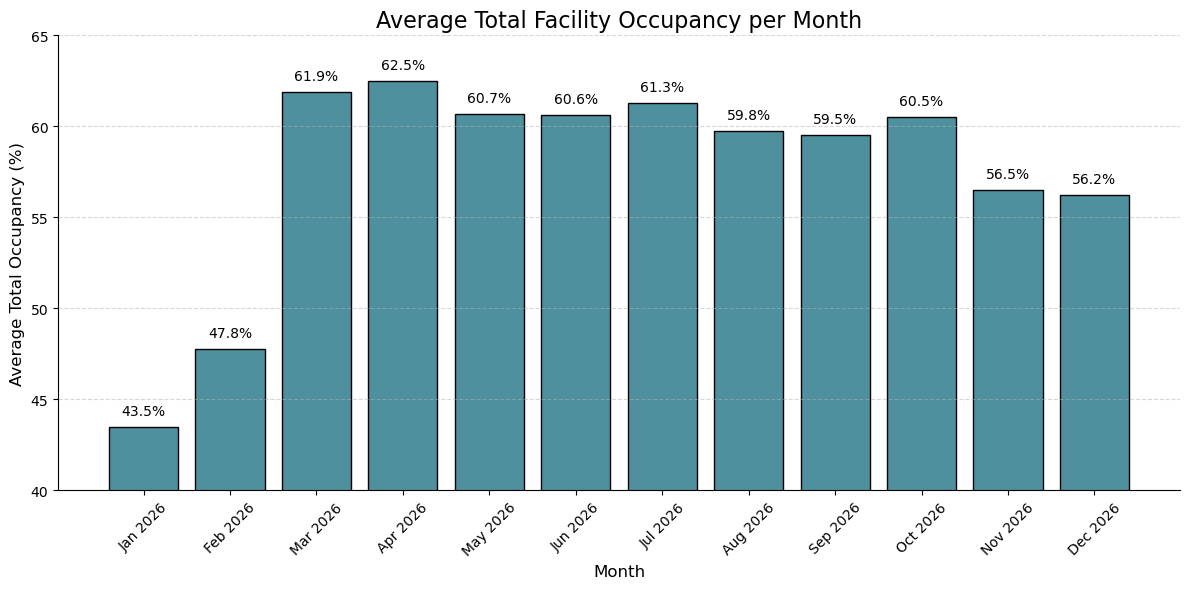

In [83]:

# --- Ensure datetime ---
df['Date'] = pd.to_datetime(df['Date'])

# --- Compute total occupancy across all lots per day ---
df['Total Occupied'] = (
    df['LOT 2 General Occupied'] + df['LOT 2 Premium Occupied'] +
    df['LOT 3 Occupied'] + df['LOT 4 General Occupied'] +
    df['LOT 4 Premium Occupied'] + df['LOT 5 Occupied'] +
    df['LOT 6 Occupied']
)

df['Total Spaces'] = (
    df['LOT 2 General Spaces'] + df['LOT 2 Premium Spaces'] +
    df['LOT 3 Spaces'] + df['LOT 4 General Spaces'] +
    df['LOT 4 Premium Spaces'] + df['LOT 5 Spaces'] +
    df['LOT 6 Spaces']
)

df['Total % Capacity'] = df['Total Occupied'] / df['Total Spaces']

# --- Group by month ---
df['Month'] = df['Date'].dt.to_period('M')
monthly_avg = df.groupby('Month')['Total % Capacity'].mean().reset_index()
monthly_avg['Month'] = monthly_avg['Month'].dt.to_timestamp()
monthly_avg['Average %'] = monthly_avg['Total % Capacity'] * 100

# --- Plot ---
plt.figure(figsize=(12, 6))
bars = plt.bar(
    monthly_avg['Month'].dt.strftime('%b %Y'),
    monthly_avg['Average %'],
    color='#4e909e',
    edgecolor='black'
)

# --- Add percentage labels ---
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

# --- Styling ---
plt.title("Average Total Facility Occupancy per Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Total Occupancy (%)", fontsize=12)
plt.xticks(rotation=45)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.ylim(40, 65)

# --- Save figure ---
plt.savefig(
    "avg_monthly_total_occupancy.png",
    dpi=300,
    bbox_inches='tight'
)

plt.show()


In [503]:
import pandas as pd
import numpy as np

# --- Copy base DataFrame ---
df_hypo = df.copy()

# --- Ensure datetime ---
df_hypo['Date'] = pd.to_datetime(df_hypo['Date'])

# --- Define month multipliers relative to January ---
# Jan = 0%, Feb = +1%, Mar = +2%, etc.
month_increase = {
    1: 0.00,  # January
    2: 0.02,  # February
    3: 0.04,
    4: 0.06,
    5: 0.08,
    6: 0.1,
    7: 0.12,
    8: 0.14,
    9: 0.16,
    10: 0.18,
    11: 0.2,
    12: 0.22
}

# --- Apply month multiplier ---
df_hypo['Month'] = df_hypo['Date'].dt.month
df_hypo['Multiplier'] = df_hypo['Month'].map(month_increase)

# --- Identify occupancy and capacity columns ---
occ_cols = [col for col in df_hypo.columns if "Occupied" in col]
space_cols = [col for col in df_hypo.columns if "Spaces" in col]
pct_cols = [col for col in df_hypo.columns if "% Capacity" in col]

# --- Adjust occupied counts based on month multiplier ---
for col in occ_cols:
    df_hypo[col] = df_hypo[col] * (1 + df_hypo['Multiplier'])

# --- Recalculate % capacity columns ---
for col in pct_cols:
    # find corresponding occupied + space columns
    base_name = col.split('% Capacity')[0].strip()
    occ_col = next((c for c in occ_cols if base_name in c), None)
    space_col = next((c for c in space_cols if base_name in c), None)
    
    if occ_col and space_col:
        df_hypo[col] = df_hypo[occ_col] / df_hypo[space_col]

# --- Drop helper columns ---
df_hypo = df_hypo.drop(columns=['Month', 'Multiplier'])

# --- Verify change ---
df_hypo['Total Occupied'] = (
    df_hypo['LOT 2 General Occupied'] + df_hypo['LOT 2 Premium Occupied'] +
    df_hypo['LOT 3 Occupied'] + df_hypo['LOT 4 General Occupied'] +
    df_hypo['LOT 4 Premium Occupied'] + df_hypo['LOT 5 Occupied'] +
    df_hypo['LOT 6 Occupied']
)
df_hypo['Total Spaces'] = (
    df_hypo['LOT 2 General Spaces'] + df_hypo['LOT 2 Premium Spaces'] +
    df_hypo['LOT 3 Spaces'] + df_hypo['LOT 4 General Spaces'] +
    df_hypo['LOT 4 Premium Spaces'] + df_hypo['LOT 5 Spaces'] +
    df_hypo['LOT 6 Spaces']
)
df_hypo['Total % Capacity'] = df_hypo['Total Occupied'] / df_hypo['Total Spaces']

# --- Check average monthly change ---
monthly_check = (
    df_hypo
    .assign(Month=df_hypo['Date'].dt.to_period('M'))
    .groupby('Month')['Total % Capacity']
    .mean()
    .reset_index()
)
monthly_check['Month'] = monthly_check['Month'].dt.strftime('%b')
print(monthly_check)


   Month  Total % Capacity
0    Jan          0.434957
1    Feb          0.487105
2    Mar          0.643684
3    Apr          0.662384
4    May          0.655353
5    Jun          0.666686
6    Jul          0.686435
7    Aug          0.681282
8    Sep          0.690455
9    Oct          0.714024
10   Nov          0.677927
11   Dec          0.686019


In [505]:
df_hypo.tail()

,Date,DayOfWeek,LOT 2 General % Capacity,LOT 2 General Occupied,LOT 2 General Spaces,LOT 2 Premium % Capacity,LOT 2 Premium Occupied,LOT 2 Premium Spaces,LOT 3 % Capacity,LOT 3 Occupied,...,LOT 4 Premium Spaces,LOT 5 % Capacity,LOT 5 Occupied,LOT 5 Spaces,LOT 6 % Capacity,LOT 6 Occupied,LOT 6 Spaces,Total Occupied,Total Spaces,Total % Capacity
360,2026-12-27,Sunday,0.719128,873.021659,1214,0.932694,321.779328,345,0.817949,974.994962,...,350,0.659534,1514.289630,2296,0.527492,705.257135,1337,5642.156250,8164,0.691102
361,2026-12-28,Monday,0.712078,864.463013,1214,0.980011,338.103785,345,0.688483,820.672137,...,350,0.568274,1304.756091,2296,0.502872,672.339676,1337,5367.250361,8164,0.657429
362,2026-12-29,Tuesday,0.691022,838.901075,1214,0.998914,344.625228,345,0.639874,762.730135,...,350,0.512147,1175.889187,2296,0.463347,619.494746,1337,5182.400596,8164,0.634787
363,2026-12-30,Wednesday,0.733031,889.899652,1214,1.034326,356.842554,345,0.673491,802.800889,...,350,0.537057,1233.083769,2296,0.490323,655.562091,1337,5429.181340,8164,0.665015
364,2026-12-31,Thursday,0.723072,877.809738,1214,1.027134,354.361398,345,0.803676,957.981302,...,350,0.600692,1379.189216,2296,0.494110,660.624926,1337,5640.196269,8164,0.690862


In [507]:
df.tail()

,Date,DayOfWeek,LOT 2 General % Capacity,LOT 2 General Occupied,LOT 2 General Spaces,LOT 2 Premium % Capacity,LOT 2 Premium Occupied,LOT 2 Premium Spaces,LOT 3 % Capacity,LOT 3 Occupied,...,LOT 5 % Capacity,LOT 5 Occupied,LOT 5 Spaces,LOT 6 % Capacity,LOT 6 Occupied,LOT 6 Spaces,Total Occupied,Total Spaces,Total % Capacity,Month
360,2026-12-27,Sunday,0.589099,715.591524,1214,0.765514,263.753548,345,0.670450,799.176198,...,0.542089,1241.221008,2296,0.453112,578.079619,1337,4624.718238,8164,0.566477,2026-12
361,2026-12-28,Monday,0.583646,708.576240,1214,0.782256,277.134250,345,0.564331,672.682079,...,0.465798,1069.472206,2296,0.426189,551.098095,1337,4399.385542,8164,0.538876,2026-12
362,2026-12-29,Tuesday,0.566386,687.623832,1214,0.828160,282.479695,345,0.524487,625.188636,...,0.419793,963.843596,2296,0.386342,507.782578,1337,4247.869341,8164,0.520317,2026-12
363,2026-12-30,Wednesday,0.600818,729.425944,1214,0.850463,292.493897,345,0.552042,658.033516,...,0.440211,1010.724401,2296,0.400628,537.345976,1337,4450.148639,8164,0.545094,2026-12
364,2026-12-31,Thursday,0.593138,719.516179,1214,0.843365,290.460163,345,0.658750,785.230576,...,0.493201,1130.482964,2296,0.412218,541.495841,1337,4623.111695,8164,0.566280,2026-12


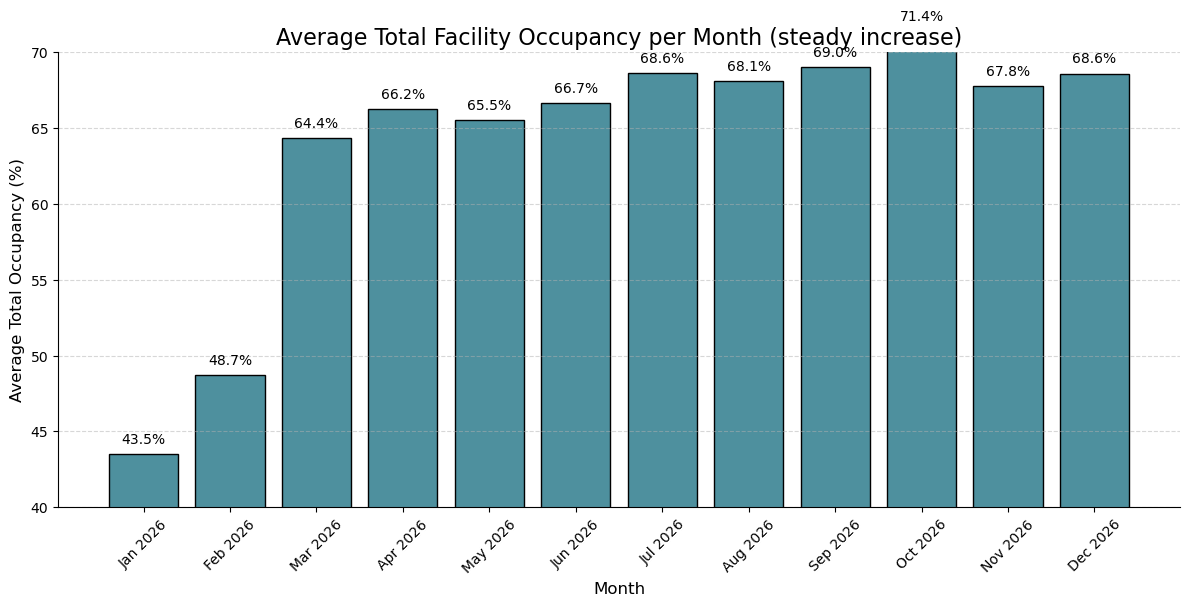

In [508]:

# --- Ensure datetime ---
df_hypo['Date'] = pd.to_datetime(df_hypo['Date'])

# --- Compute total occupancy across all lots per day ---
df_hypo['Total Occupied'] = (
    df_hypo['LOT 2 General Occupied'] + df_hypo['LOT 2 Premium Occupied'] +
    df_hypo['LOT 3 Occupied'] + df_hypo['LOT 4 General Occupied'] +
    df_hypo['LOT 4 Premium Occupied'] + df_hypo['LOT 5 Occupied'] +
    df_hypo['LOT 6 Occupied']
)

df_hypo['Total Spaces'] = (
    df_hypo['LOT 2 General Spaces'] + df_hypo['LOT 2 Premium Spaces'] +
    df_hypo['LOT 3 Spaces'] + df_hypo['LOT 4 General Spaces'] +
    df_hypo['LOT 4 Premium Spaces'] + df_hypo['LOT 5 Spaces'] +
    df_hypo['LOT 6 Spaces']
)

df_hypo['Total % Capacity'] = df_hypo['Total Occupied'] / df_hypo['Total Spaces']

# --- Group by month ---
df_hypo['Month'] = df_hypo['Date'].dt.to_period('M')
monthly_avg = df_hypo.groupby('Month')['Total % Capacity'].mean().reset_index()
monthly_avg['Month'] = monthly_avg['Month'].dt.to_timestamp()
monthly_avg['Average %'] = monthly_avg['Total % Capacity'] * 100

# --- Plot ---
plt.figure(figsize=(12, 6))
bars = plt.bar(
    monthly_avg['Month'].dt.strftime('%b %Y'),
    monthly_avg['Average %'],
    color='#4e909e',
    edgecolor='black'
)

# --- Add percentage labels ---
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

# --- Styling ---
plt.title("Average Total Facility Occupancy per Month (steady increase)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Total Occupancy (%)", fontsize=12)
plt.xticks(rotation=45)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.ylim(40, 70)

# --- Save figure ---
plt.savefig(
    "avg_monthly_total_occupancy.png",
    dpi=300,
    bbox_inches='tight'
)

plt.show()


In [510]:
# --- Ensure datetime in both ---
df['Date'] = pd.to_datetime(df['Date'])
df_hypo['Date'] = pd.to_datetime(df_hypo['Date'])

# --- Compute total % capacity per month for original df ---
df['Total Occupied'] = (
    df['LOT 2 General Occupied'] + df['LOT 2 Premium Occupied'] +
    df['LOT 3 Occupied'] + df['LOT 4 General Occupied'] +
    df['LOT 4 Premium Occupied'] + df['LOT 5 Occupied'] +
    df['LOT 6 Occupied']
)
df['Total Spaces'] = (
    df['LOT 2 General Spaces'] + df['LOT 2 Premium Spaces'] +
    df['LOT 3 Spaces'] + df['LOT 4 General Spaces'] +
    df['LOT 4 Premium Spaces'] + df['LOT 5 Spaces'] +
    df['LOT 6 Spaces']
)
df['Total % Capacity'] = df['Total Occupied'] / df['Total Spaces']
monthly_orig = df.groupby(df['Date'].dt.to_period('M'))['Total % Capacity'].mean().reset_index()
monthly_orig['Month'] = monthly_orig['Date'].dt.to_timestamp()

# --- Compute total % capacity per month for hypothetical df ---
df_hypo['Total Occupied'] = (
    df_hypo['LOT 2 General Occupied'] + df_hypo['LOT 2 Premium Occupied'] +
    df_hypo['LOT 3 Occupied'] + df_hypo['LOT 4 General Occupied'] +
    df_hypo['LOT 4 Premium Occupied'] + df_hypo['LOT 5 Occupied'] +
    df_hypo['LOT 6 Occupied']
)
df_hypo['Total Spaces'] = (
    df_hypo['LOT 2 General Spaces'] + df_hypo['LOT 2 Premium Spaces'] +
    df_hypo['LOT 3 Spaces'] + df_hypo['LOT 4 General Spaces'] +
    df_hypo['LOT 4 Premium Spaces'] + df_hypo['LOT 5 Spaces'] +
    df_hypo['LOT 6 Spaces']
)
df_hypo['Total % Capacity'] = df_hypo['Total Occupied'] / df_hypo['Total Spaces']
monthly_hypo = df_hypo.groupby(df_hypo['Date'].dt.to_period('M'))['Total % Capacity'].mean().reset_index()
monthly_hypo['Month'] = monthly_hypo['Date'].dt.to_timestamp()

# --- Merge and compute percent difference ---
monthly_compare = monthly_orig.merge(
    monthly_hypo,
    on='Month',
    suffixes=('_orig', '_hypo')
)

monthly_compare['Percent Diff'] = (
    (monthly_compare['Total % Capacity_hypo'] - monthly_compare['Total % Capacity_orig'])
    / monthly_compare['Total % Capacity_orig'] * 100
)

# --- Display ---
monthly_compare[['Month', 'Total % Capacity_orig', 'Total % Capacity_hypo', 'Percent Diff']]


,Month,Total % Capacity_orig,Total % Capacity_hypo,Percent Diff
0,2026-01-01,0.434957,0.434957,0.0
1,2026-02-01,0.477554,0.487105,2.0
2,2026-03-01,0.618926,0.643684,4.0
3,2026-04-01,0.624891,0.662384,6.0
4,2026-05-01,0.606808,0.655353,8.0
5,2026-06-01,0.606078,0.666686,10.0
6,2026-07-01,0.612888,0.686435,12.0
7,2026-08-01,0.597616,0.681282,14.0
8,2026-09-01,0.595220,0.690455,16.0
9,2026-10-01,0.605105,0.714024,18.0


[0 1 2 3 4 6]
[5]
[0 1 2 4 6]
[3 5]
[0 1 4]
[2 3 5 6]
[0 1 3 4]
[2 5 6]


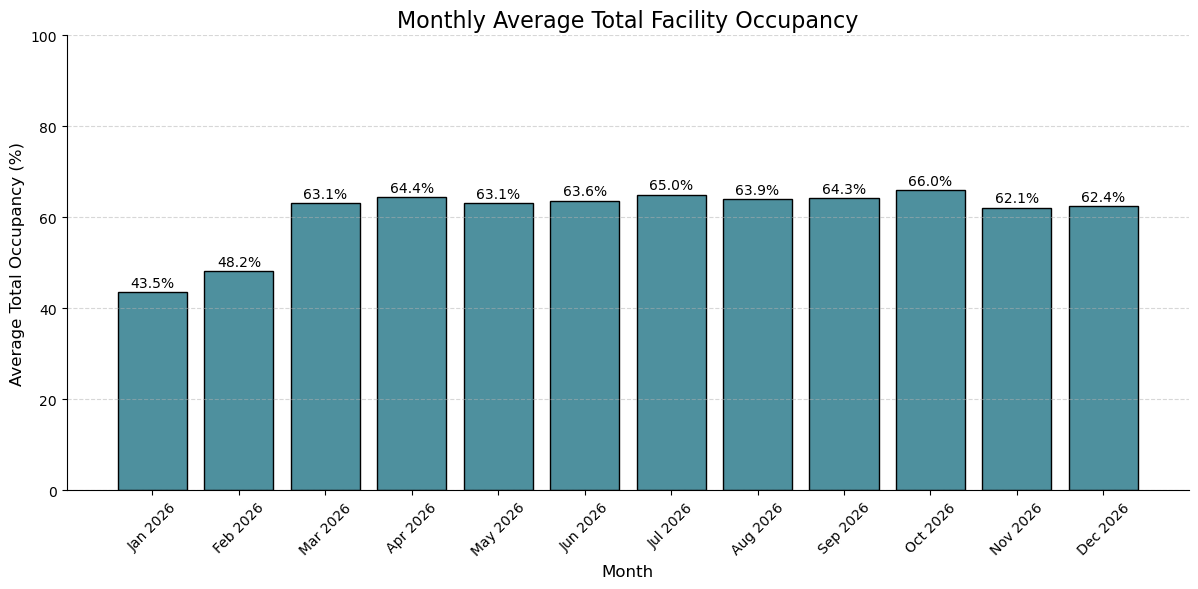

In [511]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Copy your dataframe ---
df_hypo_converge = df_hypo.copy()
df_hypo_converge['Date'] = pd.to_datetime(df_plot['Date'])

# --- Optional: define lot columns if needed ---
lot_occ_cols = [
    'LOT 2 General Occupied', 'LOT 2 Premium Occupied',
    'LOT 3 Occupied', 'LOT 4 General Occupied',
    'LOT 4 Premium Occupied', 'LOT 5 Occupied',
    'LOT 6 Occupied'
]

lot_space_cols = [
    'LOT 2 General Spaces', 'LOT 2 Premium Spaces',
    'LOT 3 Spaces', 'LOT 4 General Spaces',
    'LOT 4 Premium Spaces', 'LOT 5 Spaces',
    'LOT 6 Spaces'
]

# --- Your occupancy calculation goes here ---
# e.g., you might adjust lot occupancies or total % capacity
# df_plot['Total % Capacity'] = ...

strength = 0.0005

# --- Compute space ratios once ---
spaces_array = df_hypo_converge[lot_space_cols].iloc[0].values  # assuming lot spaces are constant per lot
space_ratios = spaces_array / spaces_array.sum()  # ratio of each lot to total spaces


for i in range(len(df_hypo_converge)):
       # --- Per row adjustment based on lots above/below average ---
    occ = df_hypo_converge.loc[i, lot_occ_cols].values
    spaces = df_hypo_converge.loc[i, lot_space_cols].values
    total_occ = occ.sum()
    total_spaces = spaces.sum()
    
    # Current total % for this row
    current_total_pct = total_occ / total_spaces
    
    # --- Identify lots above/below current total % ---
    lot_pcts = occ / spaces
    above_idx = np.where(lot_pcts > current_total_pct)[0]
    below_idx = np.where(lot_pcts <= current_total_pct)[0]

    if (i % 100 == 0):
        print(above_idx)
        print(below_idx)
    
    # Count of lots above and below
    num_above = len(above_idx)
    num_below = len(below_idx)
    
    # --- Subtract 1% from each lot above average ---
    reduction = strength * spaces[above_idx]  # 1% of each lot's capacity
    occ[above_idx] -= reduction
    total_reduction = reduction.sum()
    
    # Redistribute equally among below-average lots
    if len(below_idx) > 0:
        increase_per_lot = total_reduction / len(below_idx)
        occ[below_idx] += increase_per_lot

    
    # --- Save back ---
    df_hypo_converge.loc[i, lot_occ_cols] = occ
    df_hypo_converge.loc[i, 'Total % Capacity'] = occ.sum() / total_spaces


    #increase_power
    strength += 0.0005
# --- Monthly averages ---
df_plot['Month'] = df_plot['Date'].dt.to_period('M')
monthly_avg = df_plot.groupby('Month')['Total % Capacity'].mean().reset_index()
monthly_avg['Month'] = monthly_avg['Month'].dt.to_timestamp()
monthly_avg['Average %'] = monthly_avg['Total % Capacity'] * 100

# --- Plot ---
plt.figure(figsize=(12,6))
bars = plt.bar(
    monthly_avg['Month'].dt.strftime('%b %Y'),
    monthly_avg['Average %'],
    color='#4e909e',
    edgecolor='black'
)

# Add value labels
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.5,
        f'{bar.get_height():.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("Monthly Average Total Facility Occupancy", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Total Occupancy (%)", fontsize=12)
plt.xticks(rotation=45)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.ylim(0, 100)  # adjust as needed
plt.show()


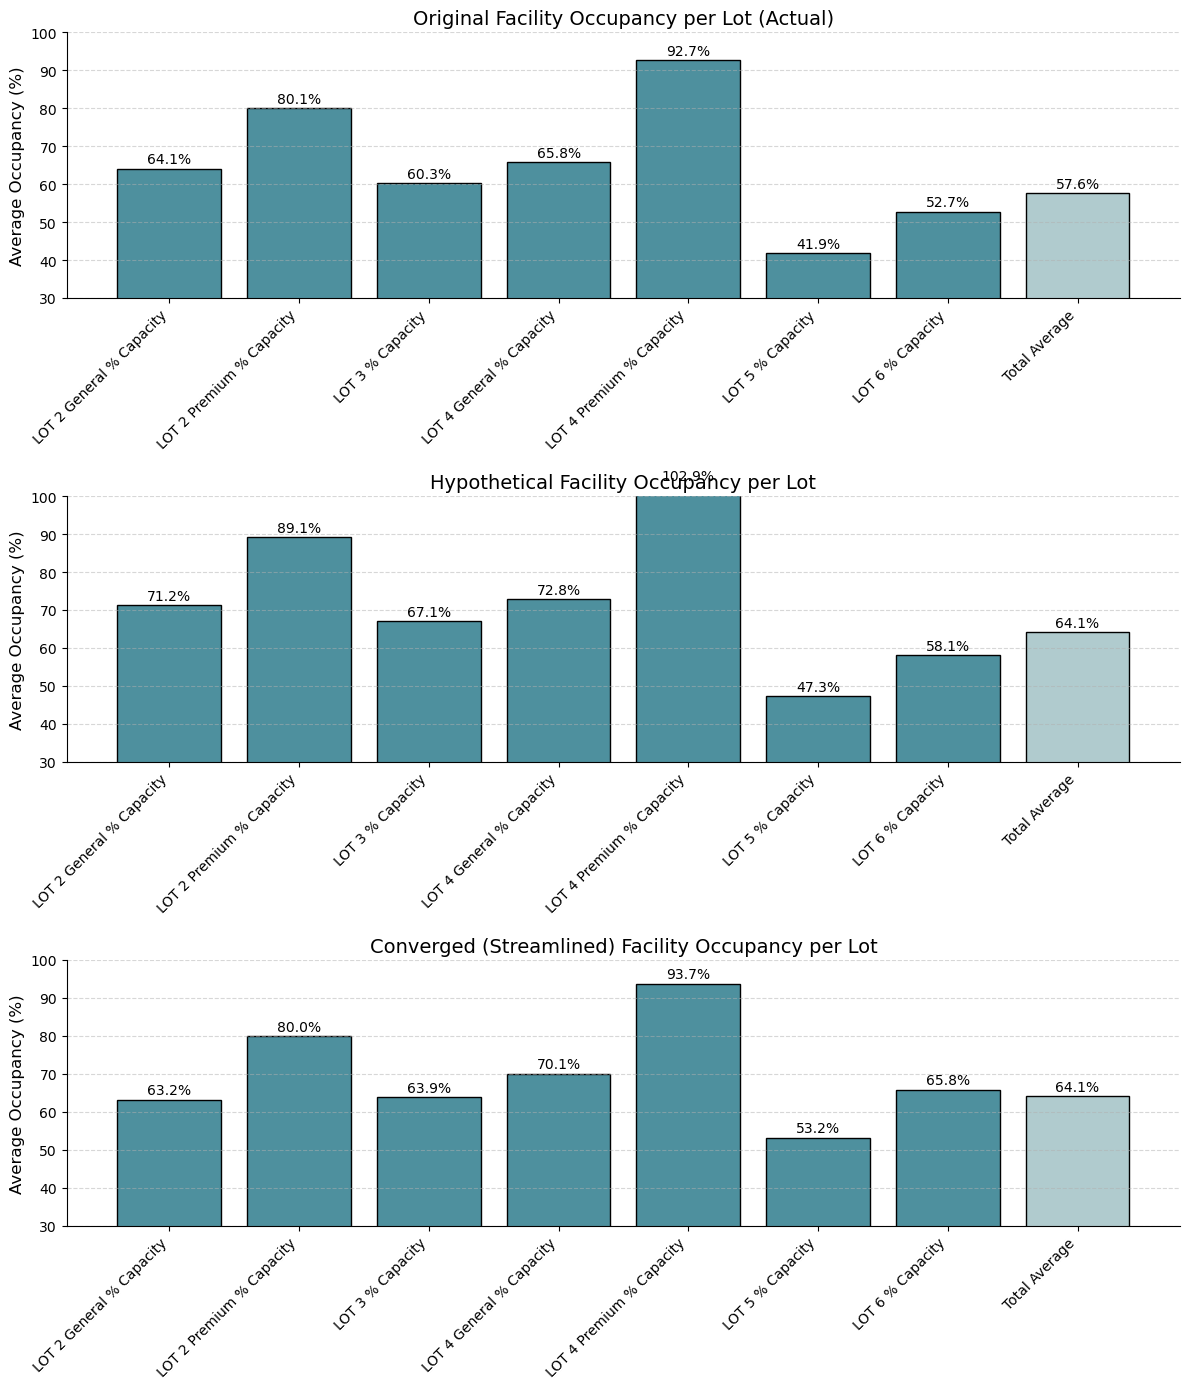

In [512]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Helper: compute weighted yearly lot averages ---
def compute_lot_averages(df):
    lot_occ_cols = [
        'LOT 2 General Occupied', 'LOT 2 Premium Occupied',
        'LOT 3 Occupied', 'LOT 4 General Occupied',
        'LOT 4 Premium Occupied', 'LOT 5 Occupied',
        'LOT 6 Occupied'
    ]
    lot_space_cols = [
        'LOT 2 General Spaces', 'LOT 2 Premium Spaces',
        'LOT 3 Spaces', 'LOT 4 General Spaces',
        'LOT 4 Premium Spaces', 'LOT 5 Spaces',
        'LOT 6 Spaces'
    ]
    
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Compute weighted % capacity per lot across all rows
    weighted_pcts = {}
    for occ_col, space_col in zip(lot_occ_cols, lot_space_cols):
        total_occ = df[occ_col].sum()
        total_space = df[space_col].sum()
        weighted_pcts[occ_col.replace('Occupied', '% Capacity')] = (total_occ / total_space) * 100
    
    # Compute total facility % capacity correctly
    total_occ_all = df[lot_occ_cols].sum().sum()
    total_space_all = df[lot_space_cols].sum().sum()
    total_avg = (total_occ_all / total_space_all) * 100
    
    weighted_pcts['Total Average'] = total_avg
    return pd.Series(weighted_pcts)

# --- Compute averages for each dataset ---
avg_df = compute_lot_averages(df)
avg_hypo = compute_lot_averages(df_hypo)
avg_converge = compute_lot_averages(df_hypo_converge)

# --- Plot setup ---
fig, axes = plt.subplots(3, 1, figsize=(12, 14), sharey=True)

datasets = [
    (avg_df, "Original Facility Occupancy per Lot (Actual)"),
    (avg_hypo, "Hypothetical Facility Occupancy per Lot"),
    (avg_converge, "Converged (Streamlined) Facility Occupancy per Lot")
]

bar_color = "#4e909e"
avg_color = "#b0cbce"
edge_color = "black"

for ax, (avg, title) in zip(axes, datasets):
    colors = [bar_color] * (len(avg) - 1) + [avg_color]
    bars = ax.bar(avg.index, avg.values, color=colors, edgecolor=edge_color)
    
    # Add labels
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.6,
            f'{height:.1f}%',
            ha='center', va='bottom', fontsize=10
        )
    
    # Tick labels
    ax.set_xticks([bar.get_x() + bar.get_width() / 2 for bar in bars])
    ax.set_xticklabels(avg.index, rotation=45, ha='right')
    
    ax.set_title(title, fontsize=14, fontweight='normal')
    ax.set_ylabel("Average Occupancy (%)", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    sns.despine(ax=ax)
    ax.set_ylim(30, 100)

plt.tight_layout()
plt.savefig("lot_facility_comparison_yearly_with_total.png", dpi=300, bbox_inches='tight')
plt.show()


In [513]:
# Sum total occupied across all rows for original df_hypo
total_original_occ = df_hypo[lot_occ_cols].sum().sum()

# Sum total occupied across all rows for df_hypo_converge
total_converge_occ = df_hypo_converge[lot_occ_cols].sum().sum()

print(f"Total occupied in original df_hypo: {total_original_occ}")
print(f"Total occupied in df_hypo_converge: {total_converge_occ}")
print(f"Difference: {total_converge_occ - total_original_occ}")

Total occupied in original df_hypo: 1911330.0263821862
Total occupied in df_hypo_converge: 1911330.026382186
Difference: -2.3283064365386963e-10


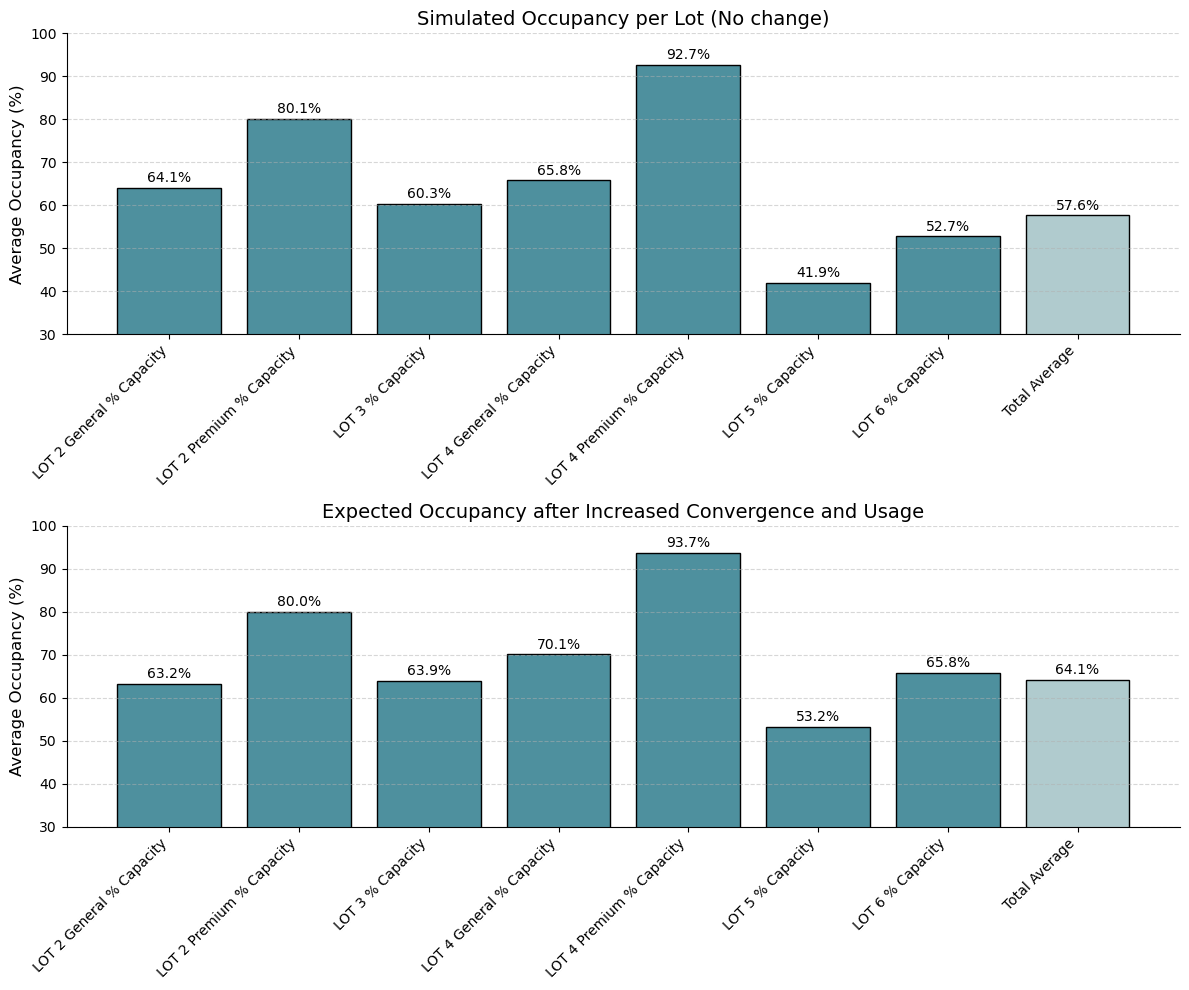

In [514]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Helper: compute weighted yearly lot averages ---
def compute_lot_averages(df):
    lot_occ_cols = [
        'LOT 2 General Occupied', 'LOT 2 Premium Occupied',
        'LOT 3 Occupied', 'LOT 4 General Occupied',
        'LOT 4 Premium Occupied', 'LOT 5 Occupied',
        'LOT 6 Occupied'
    ]
    lot_space_cols = [
        'LOT 2 General Spaces', 'LOT 2 Premium Spaces',
        'LOT 3 Spaces', 'LOT 4 General Spaces',
        'LOT 4 Premium Spaces', 'LOT 5 Spaces',
        'LOT 6 Spaces'
    ]
    
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Compute weighted % capacity per lot
    weighted_pcts = {}
    for occ_col, space_col in zip(lot_occ_cols, lot_space_cols):
        total_occ = df[occ_col].sum()
        total_space = df[space_col].sum()
        weighted_pcts[occ_col.replace('Occupied', '% Capacity')] = (total_occ / total_space) * 100
    
    # Compute total facility % capacity
    total_occ_all = df[lot_occ_cols].sum().sum()
    total_space_all = df[lot_space_cols].sum().sum()
    weighted_pcts['Total Average'] = (total_occ_all / total_space_all) * 100
    
    return pd.Series(weighted_pcts)

# --- Compute averages for the two datasets ---
avg_df = compute_lot_averages(df)
avg_converge = compute_lot_averages(df_hypo_converge)

# --- Plot setup ---
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharey=True)

datasets = [
    (avg_df, "Simulated Occupancy per Lot (No change)"),
    (avg_converge, "Expected Occupancy after Increased Convergence and Usage")
]

bar_color = "#4e909e"
avg_color = "#b0cbce"
edge_color = "black"

for ax, (avg, title) in zip(axes, datasets):
    colors = [bar_color] * (len(avg) - 1) + [avg_color]
    bars = ax.bar(avg.index, avg.values, color=colors, edgecolor=edge_color)
    
    # Add labels
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.6,
            f'{height:.1f}%',
            ha='center', va='bottom', fontsize=10
        )
    
    # Tick labels
    ax.set_xticks([bar.get_x() + bar.get_width() / 2 for bar in bars])
    ax.set_xticklabels(avg.index, rotation=45, ha='right')
    
    ax.set_title(title, fontsize=14, fontweight='normal')
    ax.set_ylabel("Average Occupancy (%)", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    sns.despine(ax=ax)
    ax.set_ylim(30, 100)

plt.tight_layout()
plt.savefig("lot_facility_comparison_actual_vs_expected.png", dpi=300, bbox_inches='tight')
plt.show()
